# Reinforcement Learning

**Reinforcement Learning (RL)** is a type of machine learning where an agent learns to make decisions by interacting with an environment. The agent aims to maximize cumulative rewards over time by taking actions that lead to favorable outcomes.

## Reinforcement Learning (RL)

### Problem Description:
In RL, the agent explores an environment to find an optimal policy (strategy) that determines the best action to take in each state. The goal is to learn a policy that maximizes the total reward over time, known as the **cumulative reward** or **return**.

### Key Concepts:
1. **Agent**: The decision-maker that interacts with the environment.
2. **Environment**: The system with which the agent interacts.
3. **State ($s$)**: The current situation or observation from the environment.
4. **Action ($a$)**: A choice made by the agent that changes the state.
5. **Reward ($r$)**: Feedback received from the environment for taking an action in a state.
6. **Policy ($\pi$)**: A mapping from states to actions that defines the agent's behavior.
7. **Value Function ($V(s)$)**: Estimates the expected cumulative reward starting from state $s$ and following a policy.

### Reinforcement Learning Process:
1. **Exploration**: The agent tries new actions to discover their effects.
2. **Exploitation**: The agent uses knowledge of past actions to maximize rewards.
3. **Learning**: The agent updates its policy or value function based on rewards.

### Types of RL Algorithms:
1. **Model-Free RL**: The agent learns directly from interactions with the environment without knowing the transition probabilities (e.g., Q-Learning, Deep Q-Networks).
2. **Model-Based RL**: The agent learns a model of the environment to predict the outcome of actions (e.g., Dyna-Q).

### RL Objective:
The agent aims to learn a policy $\pi$ that maximizes the expected sum of rewards:
$$ \max \, \mathbb{E} \left[ \sum_{t=0}^{\infty} \gamma^t r_{t+1} \right] $$
Where:
- $\gamma$ is the **discount factor** (0 ≤ $\gamma$ ≤ 1) that determines the importance of future rewards.

### Steps:
1. Define the **state space**, **action space**, and **reward function**.
2. Choose an RL algorithm (e.g., Q-Learning, DQN, Policy Gradient).
3. Train the agent through episodes of interaction with the environment.
4. Evaluate the learned policy and adjust parameters for improvement.


Episode: 100, Total Reward: 27.0, Avg Reward: 21.83, Exploration Rate: 0.9522
Episode: 200, Total Reward: 21.0, Avg Reward: 21.29, Exploration Rate: 0.9062
Episode: 300, Total Reward: 14.0, Avg Reward: 21.83, Exploration Rate: 0.8625
Episode: 400, Total Reward: 15.0, Avg Reward: 19.83, Exploration Rate: 0.8209
Episode: 500, Total Reward: 18.0, Avg Reward: 21.55, Exploration Rate: 0.7814
Episode: 600, Total Reward: 14.0, Avg Reward: 22.70, Exploration Rate: 0.7438
Episode: 700, Total Reward: 19.0, Avg Reward: 21.53, Exploration Rate: 0.7080
Episode: 800, Total Reward: 10.0, Avg Reward: 20.84, Exploration Rate: 0.6739
Episode: 900, Total Reward: 17.0, Avg Reward: 21.38, Exploration Rate: 0.6416
Episode: 1000, Total Reward: 28.0, Avg Reward: 21.81, Exploration Rate: 0.6108


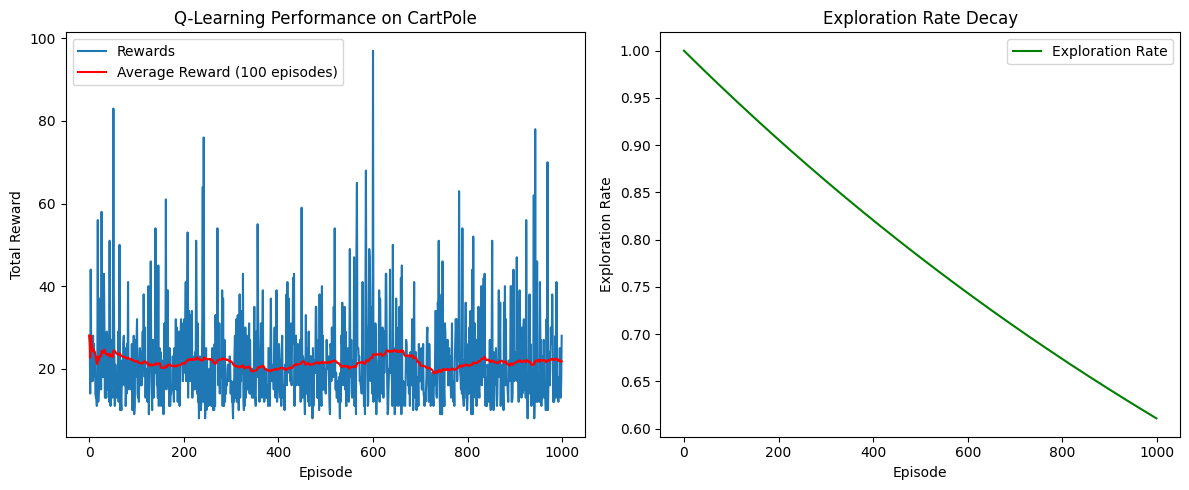

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.


Total reward during test run: 24.0
Video saved in ./videos


In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import os

# Create the environment
env = gym.make('CartPole-v1', new_step_api=True)

# Q-Learning hyperparameters
learning_rate = 0.05
discount_factor = 0.99  # Gamma: discount factor for future rewards
exploration_rate = 1.0  # Epsilon: initial exploration rate
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.0005

# Discretization parameters
state_space_bins = [30, 30, 50, 50]  # More bins for better resolution
q_table = np.random.uniform(low=-1, high=1, size=(state_space_bins + [env.action_space.n]))

# Updated Discretization function with clipping
def discretize_state(state):
    state_low = [-2.4, -3.0, -0.5, -3.0]  # Define reasonable lower bounds for CartPole states
    state_high = [2.4, 3.0, 0.5, 3.0]  # Define reasonable upper bounds for CartPole states
    state_bins = []

    for i in range(len(state)):
        # Clip state values to the defined lower and upper bounds
        state_value = np.clip(state[i], state_low[i], state_high[i])
        # Discretize state values into bins
        state_bin = int((state_value - state_low[i]) / (state_high[i] - state_low[i]) * state_space_bins[i])
        state_bin = np.clip(state_bin, 0, state_space_bins[i] - 1)  # Ensure the bin index is within bounds
        state_bins.append(state_bin)

    return tuple(state_bins)

# Q-Learning algorithm
def q_learning(env, q_table, episodes=5000, max_steps=200):
    global exploration_rate

    rewards = []
    average_rewards = []
    exploration_rates = []

    for episode in range(episodes):
        state = discretize_state(env.reset())
        total_rewards = 0

        for step in range(max_steps):
            # Choose action: Exploration vs Exploitation
            if np.random.rand() < exploration_rate:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit

            # Take action, observe new state and reward
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state = discretize_state(next_state)

            # Update Q-Table using the Q-Learning update rule
            q_value = q_table[state + (action,)]
            max_future_q = np.max(q_table[next_state])
            new_q_value = (1 - learning_rate) * q_value + learning_rate * (reward + discount_factor * max_future_q)
            q_table[state + (action,)] = new_q_value

            state = next_state
            total_rewards += reward

            if done:
                break

        # Reduce exploration rate
        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
        rewards.append(total_rewards)
        exploration_rates.append(exploration_rate)

        # Calculate the average reward for the last 100 episodes
        if len(rewards) >= 100:
            average_reward = np.mean(rewards[-100:])
            average_rewards.append(average_reward)
        else:
            average_rewards.append(np.mean(rewards))

        # Print progress
        if (episode + 1) % 100 == 0:
            print(f'Episode: {episode + 1}, Total Reward: {total_rewards}, Avg Reward: {average_rewards[-1]:.2f}, Exploration Rate: {exploration_rate:.4f}')

    return rewards, average_rewards, exploration_rates

# Main execution
if __name__ == "__main__":
    # Train the agent using Q-Learning
    episodes = 1000
    rewards, average_rewards, exploration_rates = q_learning(env, q_table, episodes=episodes)

    # Plot the rewards over episodes
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(rewards, label='Rewards')
    plt.plot(average_rewards, label='Average Reward (100 episodes)', color='red')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Q-Learning Performance on CartPole')
    plt.legend()

    # Plot exploration rate over episodes
    plt.subplot(1, 2, 2)
    plt.plot(exploration_rates, label='Exploration Rate', color='green')
    plt.xlabel('Episode')
    plt.ylabel('Exploration Rate')
    plt.title('Exploration Rate Decay')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Record a video of the trained agent
    video_dir = "./videos"
    os.makedirs(video_dir, exist_ok=True)

    # Wrap the environment to record a video
    env = gym.wrappers.RecordVideo(env, video_dir, episode_trigger=lambda x: x % 1000 == 0, new_step_api=True)

    state = discretize_state(env.reset())
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(q_table[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        state = discretize_state(next_state)
        total_reward += reward

    print(f'Total reward during test run: {total_reward}')
    env.close()
    print(f"Video saved in {video_dir}")


In [ ]:
from IPython.display import HTML
import base64

def show_video(video_path):
    video = open(video_path, 'rb').read()
    video_b64 = base64.b64encode(video).decode('ascii')
    return HTML(f'<video width="640" height="480" controls><source src="data:video/mp4;base64,{video_b64}" type="video/mp4"></video>')

# Show the last video saved
video_files = sorted([f for f in os.listdir(video_dir) if f.endswith('.mp4')])
show_video(os.path.join(video_dir, video_files[-1]))